In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')


In [50]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
Dataset Info:
 None

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Class Distribution:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


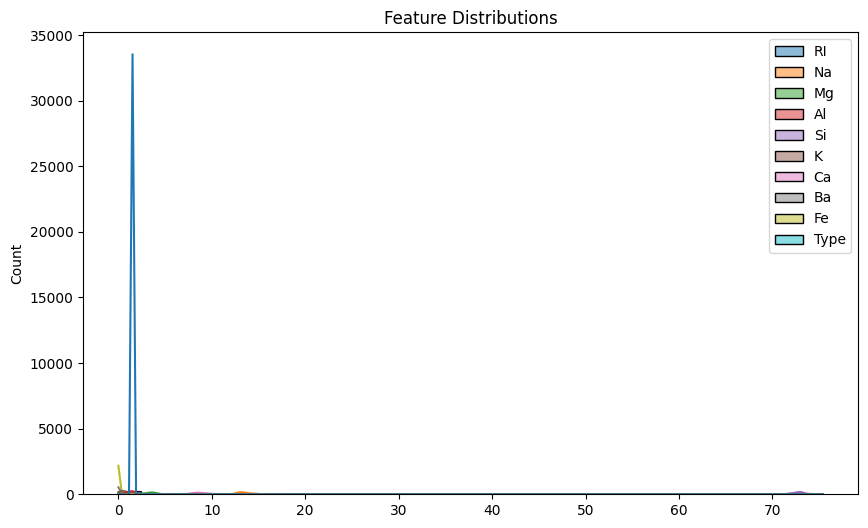

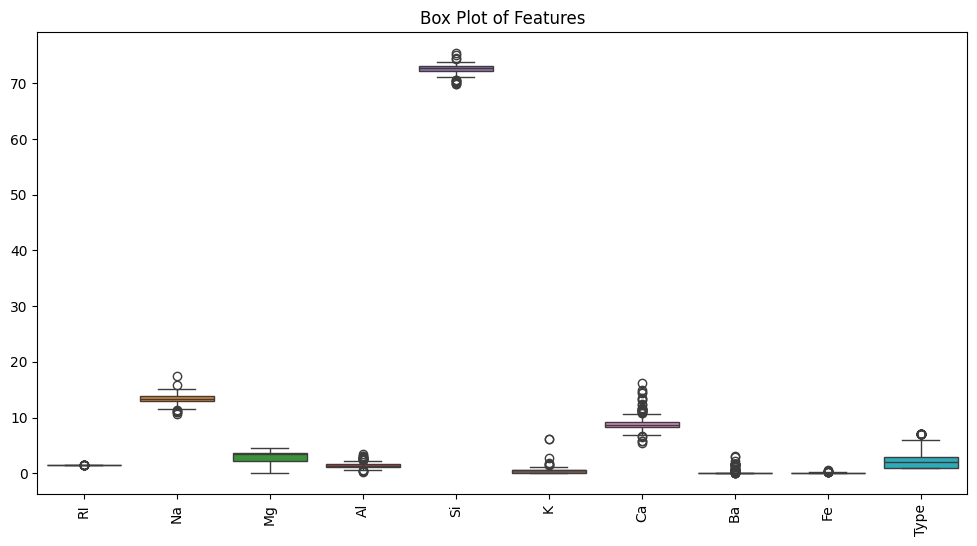

In [51]:

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True)
plt.title("Feature Distributions")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Features")
plt.xticks(rotation=90)
plt.show()

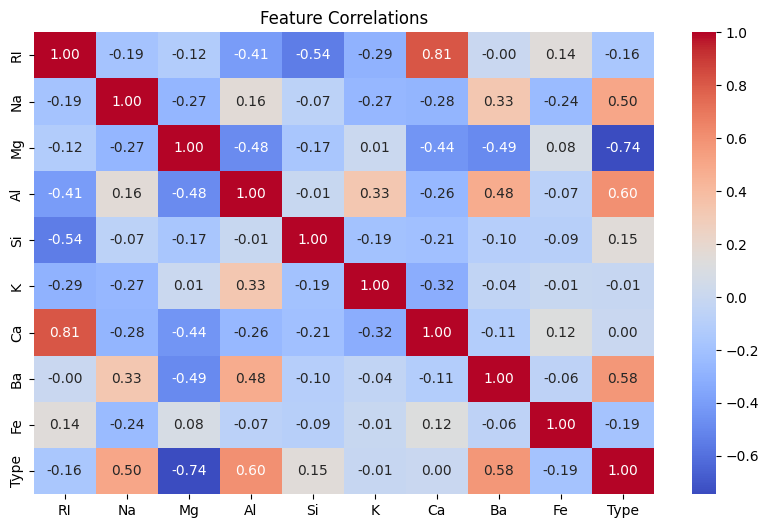

In [52]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

In [53]:
# Data Preprocessing
X = df.drop(columns=['Type'])  # Features
y = df['Type']  # Target variable

In [54]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [56]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Random Forest Model Implementation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.9347826086956522
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.93        92
weighted avg       0.94      0.93      0.93        92

Confusion Matrix:
 [[14  1  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  1  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


In [58]:
# Bagging Classifier
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("\nBagging Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))




Bagging Model Performance:
Accuracy: 0.9565217391304348


In [59]:

# Boosting Classifiers
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

print("\nAdaBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))



AdaBoost Model Performance:
Accuracy: 0.5543478260869565


In [60]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))



Gradient Boosting Model Performance:
Accuracy: 0.8913043478260869


Bagging vs Boosting:
- Bagging (Bootstrap Aggregating) involves training multiple models independently on different subsets of data and averaging their predictions.
- Boosting is a sequential technique where models learn from the mistakes of previous models to improve accuracy.
- Random Forest is an example of bagging, whereas AdaBoost and Gradient Boosting are examples of boosting


Handling Imbalanced Data:
- We used SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic samples for minority classes.